In [8]:
import pandas as pd
import re
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

In [10]:
df = pd.read_csv("/kaggle/input/air-pollution-dataset-india-2019/combined.csv", low_memory=False)

In [11]:
df.head()

,datetime,id,name,longitude,latitude,live,cityid,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,"Thursday, 03 Jan 2019, 12:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,90.0,166.0,14.0,10.0,NaN,NaN,4.0
1,"Thursday, 03 Jan 2019, 01:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,61.0,146.0,14.0,10.0,NaN,NaN,4.0
2,"Thursday, 03 Jan 2019, 02:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,56.0,151.0,14.0,10.0,NaN,NaN,5.0
3,"Thursday, 03 Jan 2019, 03:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,186.0,157.0,14.0,10.0,NaN,NaN,5.0
4,"Thursday, 03 Jan 2019, 04:00 AM",site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,238.0,164.0,14.0,11.0,NaN,NaN,5.0


In [12]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [13]:
df['datetime'] = lookup(df['datetime'])

In [14]:
#df.set_index('datetime', inplace=True)

In [15]:
df.head()

,datetime,id,name,longitude,latitude,live,cityid,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,2019-01-03 00:00:00,site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,90.0,166.0,14.0,10.0,NaN,NaN,4.0
1,2019-01-03 01:00:00,site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,61.0,146.0,14.0,10.0,NaN,NaN,4.0
2,2019-01-03 02:00:00,site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,56.0,151.0,14.0,10.0,NaN,NaN,5.0
3,2019-01-03 03:00:00,site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,186.0,157.0,14.0,10.0,NaN,NaN,5.0
4,2019-01-03 04:00:00,site_253,"Punjab Agricultural University, Ludhiana - PPCB",75.8086,30.9028,True,Ludhiana,Punjab,238.0,164.0,14.0,11.0,NaN,NaN,5.0


In [16]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476069 entries, 0 to 1476068
Data columns (total 15 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   datetime   1476069 non-null  datetime64[ns]
 1   id         1476069 non-null  object        
 2   name       1476069 non-null  object        
 3   longitude  1476069 non-null  float64       
 4   latitude   1476069 non-null  float64       
 5   live       1476069 non-null  bool          
 6   cityid     1476069 non-null  object        
 7   stateid    1476069 non-null  object        
 8   PM2.5      1297778 non-null  float64       
 9   PM10       1145634 non-null  float64       
 10  NO2        1297817 non-null  float64       
 11  NH3        998035 non-null   float64       
 12  SO2        1261794 non-null  float64       
 13  CO         1299462 non-null  float64       
 14  OZONE      1235811 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9), object

In [17]:
df.describe()

,longitude,latitude,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
count,1.476069e+06,1.476069e+06,1.297778e+06,1.145634e+06,1.297817e+06,998035.000000,1.261794e+06,1.299462e+06,1.235811e+06
mean,7.788672e+01,2.441997e+01,1.303791e+02,1.279305e+02,4.056707e+01,7.283251,1.661902e+01,4.616883e+01,3.494385e+01
std,3.638076e+00,5.614458e+00,1.189525e+02,9.743005e+01,3.722641e+01,7.176526,1.761907e+01,3.107779e+01,3.632656e+01
min,7.252048e+01,8.514909e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.633762e+01,2.000733e+01,4.500000e+01,6.200000e+01,1.600000e+01,3.000000,6.000000e+00,2.300000e+01,1.000000e+01
50%,7.720107e+01,2.690291e+01,8.000000e+01,1.060000e+02,2.900000e+01,6.000000,1.100000e+01,3.800000e+01,2.300000e+01
75%,7.784983e+01,2.865148e+01,1.870000e+02,1.570000e+02,5.300000e+01,9.000000,2.000000e+01,6.200000e+01,4.700000e+01
max,9.189850e+01,3.162000e+01,5.000000e+02,5.000000e+02,4.360000e+02,125.000000,3.250000e+02,2.000000e+02,3.230000e+02


In [18]:
df.drop('live', axis=1, inplace=True) #dropping unwanted column

In [19]:
df.shape

(1476069, 14)

### Pollutant Types

#### PM2.5 and PM10
PM2.5 refers to the atmospheric particulate matter that has a diameter of less than 2.5 micrometres, which is about 3% of the diameter of human hair.

The particles in PM2.5 category are so small that they can only be detected with the help of the electron microscope. These are smaller than PM10 particles. PM10 are the particles with a diameter of 10 micrometers and they are also called fine particles. An environmental expert says that PM10 is also known as respirable particulate matter.

#### SO2 and NO2 pullutants
The most important sources of SO2 are fossil fuel combustion, smelting, manufacture of sulphuric acid, conversion of wood pulp to paper, incineration of refuse and production of elemental sulphur. Coal burning is the single largest man-made source of SO2 accounting for about 50% of annual global emissions, with oil burning accounting for a further 25-30%.

Globally, quantities of nitrogen oxides produced naturally (by bacterial and volcanic action and lightning) far outweigh anthropogenic (man-made) emissions. Anthropogenic emissions are mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.

Nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide are important ambient air pollutants. High-intensity, confined space exposure to NO2 has caused catastrophic injury to humans, including death. Ambient NO2 exposure may increase the risk of respiratory tract infections through the pollutant's interaction with the immune system. Sulfur dioxide (SO2) contributes to respiratory symptoms in both healthy patients and those with underlying pulmonary disease.

#### CO
The major source of atmospheric CO is the spark ignition combustion engine. Smaller contributions come from processes involving the combustion of organic matter, for example in power stations and waste incineration.

#### OZONE
Most O3 in the troposphere (lower atmosphere) is formed indirectly by the action of sunlight on nitrogen dioxide - there are no direct emissions of O3 to the atmosphere. About 10 - 15% of tropospheric O3 is transported from the stratosphere where it is formed by the action of ultraviolet (UV) radiation on O2.

### Fillna values by the mean of the day and mean of the week

In [20]:
print(df['SO2'].isna().sum())
print(df['NO2'].isna().sum())
print(df['NH3'].isna().sum())
print(df['CO'].isna().sum())
print(df['OZONE'].isna().sum())

214275
178252
478034
176607
240258


In [21]:
#mean of the day
dayMeandf =  df.loc[:,['id','SO2','NO2','NH3','CO','OZONE']].groupby([df['datetime'].dt.dayofyear ,'id']).transform('mean')

In [22]:
df['SO2'].fillna(dayMeandf['SO2'], inplace=True)
df['NO2'].fillna(dayMeandf['NO2'], inplace=True)
df['NH3'].fillna(dayMeandf['NH3'], inplace=True)
df['CO'].fillna(dayMeandf['CO'], inplace=True)
df['OZONE'].fillna(dayMeandf['OZONE'], inplace=True)

In [23]:
#mean of the week
weekMeandf =  df.loc[:,['id','SO2','NO2','NH3','CO','OZONE']].groupby([df['datetime'].dt.weekofyear ,'id']).transform('mean')

In [24]:
df['SO2'].fillna(weekMeandf['SO2'], inplace=True)
df['NO2'].fillna(weekMeandf['NO2'], inplace=True)
df['NH3'].fillna(weekMeandf['NH3'], inplace=True)
df['CO'].fillna(weekMeandf['CO'], inplace=True)
df['OZONE'].fillna(weekMeandf['OZONE'], inplace=True)

In [25]:
print(df['SO2'].isna().sum())
print(df['NO2'].isna().sum())
print(df['NH3'].isna().sum())
print(df['CO'].isna().sum())
print(df['OZONE'].isna().sum())

79496
36083
357648
29357
111309


In [26]:
df.dropna(how='all', inplace=True)

### Number of stations per state

In [27]:
#number of state
df['stateid'].unique()

array(['Punjab', 'Haryana', 'Jharkhand', 'Delhi', 'Uttar Pradesh',
       'West Bengal', 'Rajasthan', 'Telangana', 'Andhra Pradesh',
       'Maharashtra', 'Karnataka', 'Bihar', 'Tamil Nadu',
       'Madhya Pradesh', 'Gujarat', 'Kerala', 'Meghalaya ', 'Chandigarh',
       'Odisha', 'Assam'], dtype=object)

In [28]:
def myfunc(x):
    return (x['id'].nunique())

stationsPerState = df.loc[:,['stateid','id']].groupby('stateid').apply(myfunc).reset_index()

In [29]:
stationsPerState.rename({0:'count'}, axis=1, inplace=True)

In [30]:
stationsPerState.sort_values('count', ascending=False, inplace=True)
stationsPerState

,stateid,count
4,Delhi,36
6,Haryana,24
18,Uttar Pradesh,24
11,Maharashtra,22
8,Karnataka,16
10,Madhya Pradesh,13
19,West Bengal,12
15,Rajasthan,10
14,Punjab,8
17,Telangana,6


Text(0.5, 1.0, 'Number of stations per state')

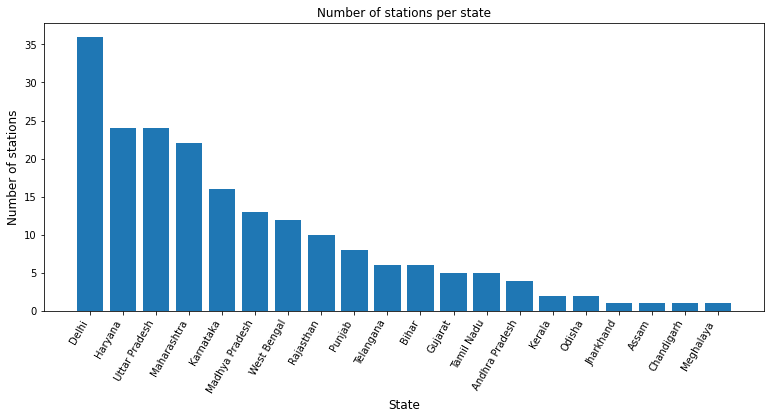

In [31]:
fig = plt.figure(figsize=[10,4])
axes = fig.add_axes([0,0,1,1])
axes.bar(stationsPerState['stateid'], stationsPerState['count'])
fig.autofmt_xdate(rotation=60)
axes.set_xlabel('State',{"fontsize":12})
axes.set_ylabel('Number of stations', {"fontsize":12})
axes.set_title('Number of stations per state')

In [32]:
def myfunc(x):
    return (x['id'].nunique())

stationsByState = df.loc[:,['stateid','cityid','id']].groupby(['stateid','cityid']).apply(myfunc)
stationsByState

stateid         cityid           
Andhra Pradesh  Amaravati            1
                Rajamahendravaram    1
                Tirupati             1
                Visakhapatnam        1
Assam           Guwahati             1
                                    ..
Uttar Pradesh   Varanasi             1
West Bengal     Asansol              1
                Howrah               3
                Kolkata              7
                Siliguri             1
Length: 109, dtype: int64

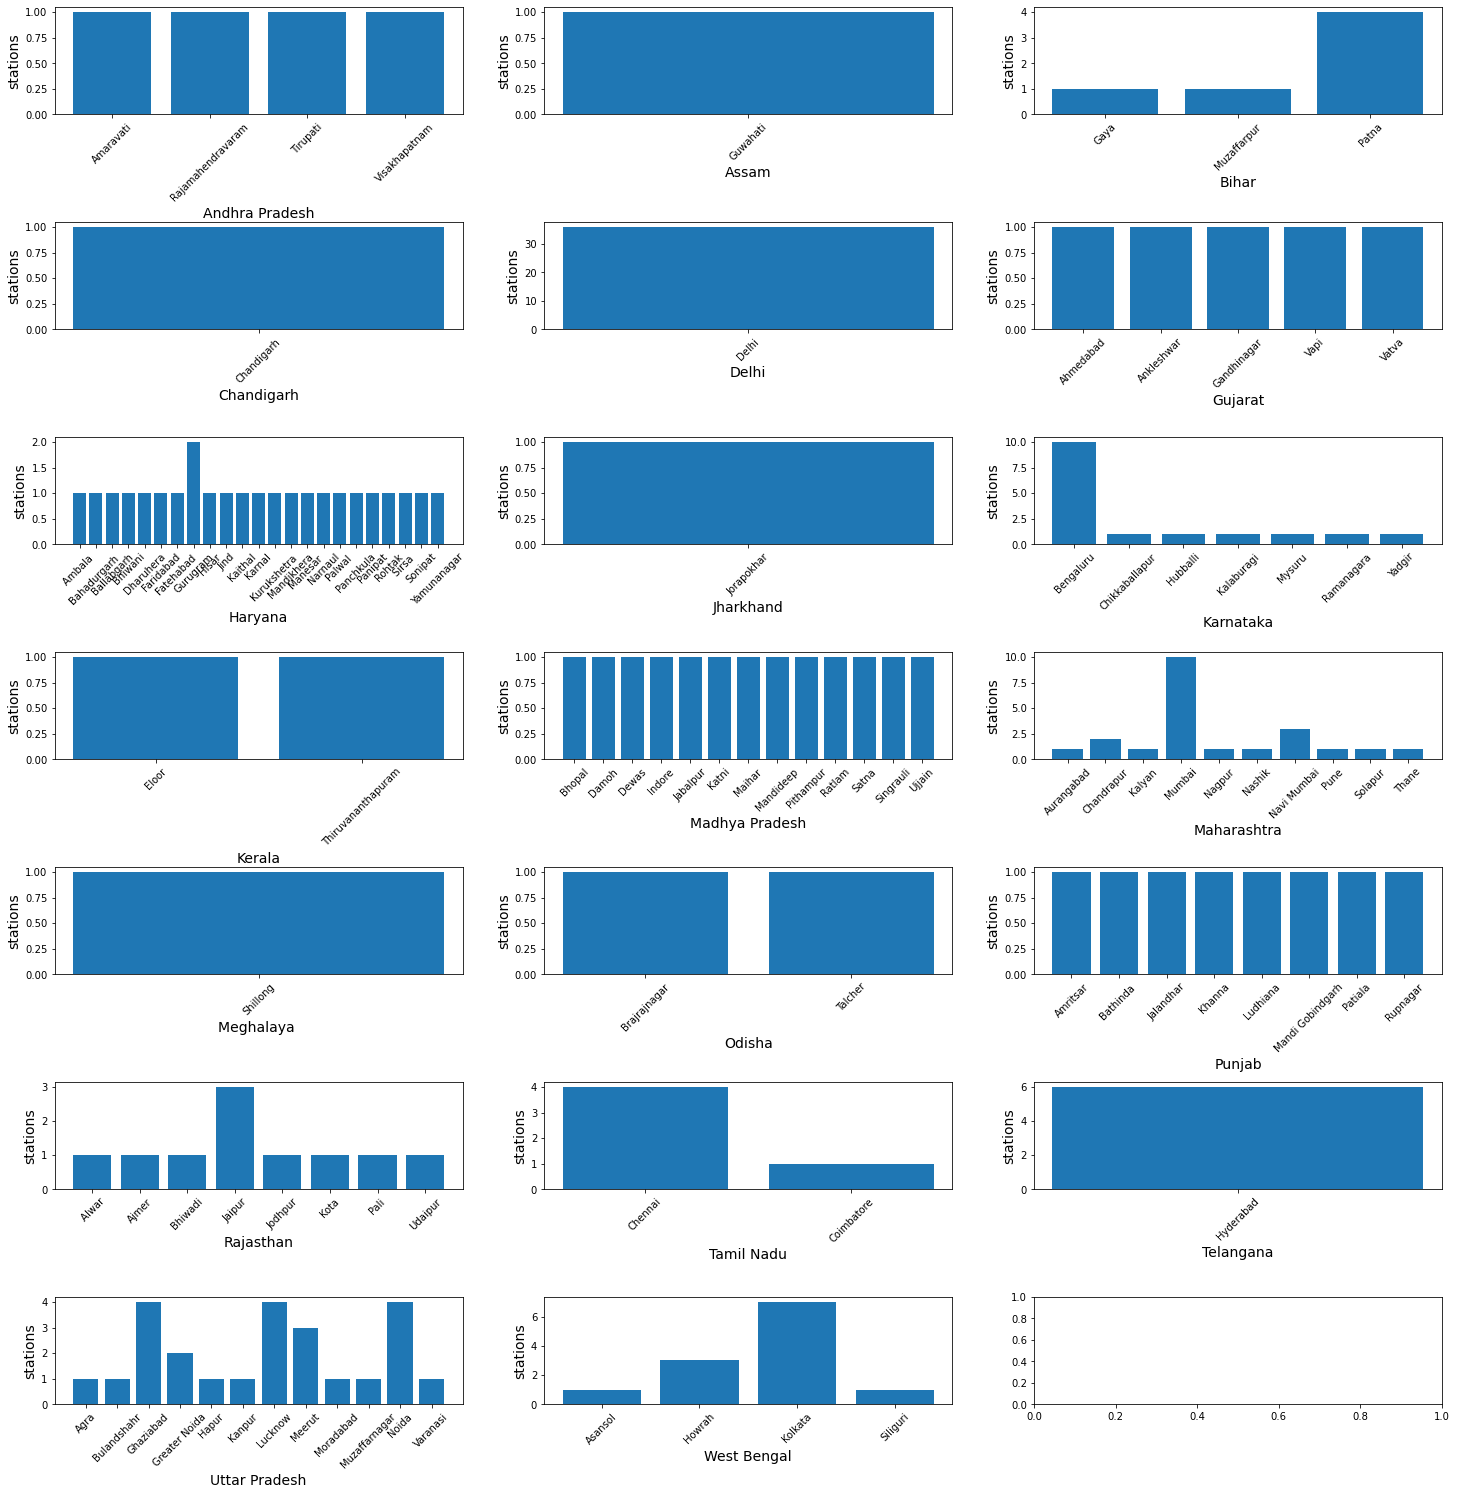

In [33]:
fig = plt.figure(figsize=[20,20])
axes = fig.subplots(7,3)
axes = axes.flatten()
fig.tight_layout()
fig.subplots_adjust(hspace=1, wspace=0.2)

for i,state in enumerate(stationsByState.index.get_level_values(0).unique()):
    axes[i].bar(stationsByState[state].index,stationsByState[state].values)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].set_xlabel(state,{"fontsize":14})
    axes[i].set_ylabel("stations", {"fontsize":14})


### States with High Pollution

In [34]:
averageByState = df.loc[:,['stateid','PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].groupby('stateid', as_index=False).mean()
averageByState

,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,Andhra Pradesh,65.259116,73.742402,34.663076,3.261853,12.581786,34.189744,40.204513
1,Assam,99.725723,90.372894,16.234524,2.578448,18.486805,34.009078,24.794025
2,Bihar,181.754640,171.459406,43.709340,8.680100,30.672106,55.756039,55.372287
3,Chandigarh,132.765240,100.877082,12.234455,3.011390,12.034603,36.025328,17.841218
4,Delhi,191.962938,185.405864,55.623284,9.125502,17.604565,60.762137,34.651642
5,Gujarat,96.461564,101.386504,50.320468,5.088982,35.208538,43.514026,27.445235
6,Haryana,145.346445,137.219375,34.156102,10.716016,16.802603,41.483650,38.092917
7,Jharkhand,117.694097,111.528255,11.620432,1.978395,23.396280,76.301412,34.729359
8,Karnataka,61.545353,72.798270,32.223860,3.280722,9.209479,40.642867,35.818270
9,Kerala,35.536174,42.937131,9.190341,3.679082,6.392036,40.203712,30.531366


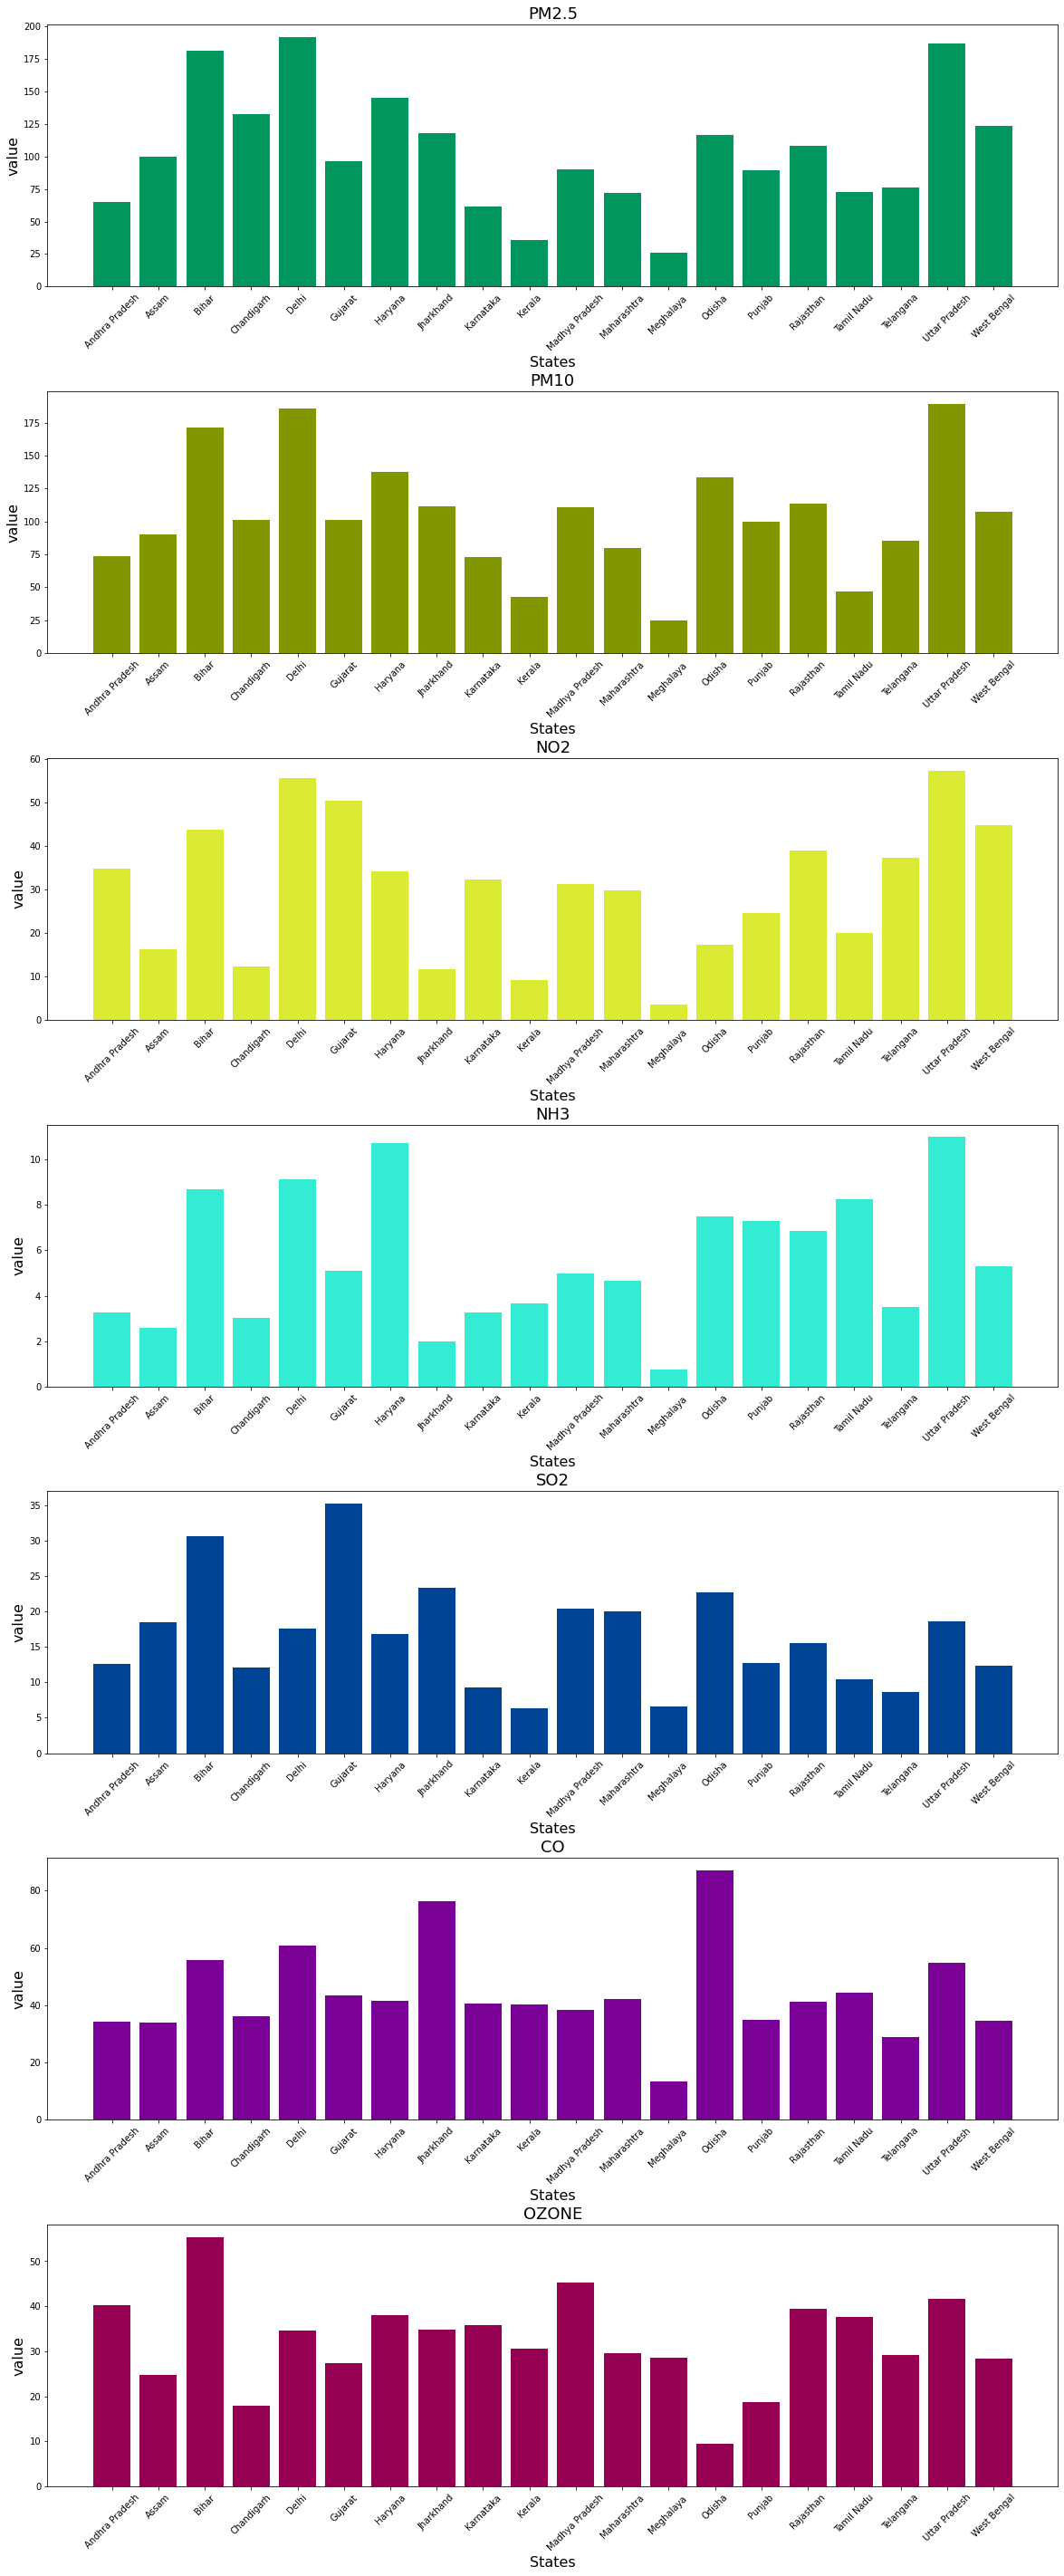

In [35]:
fig = plt.figure(figsize=[20,50])
pollutants = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']
colors = ['#00965d','#829600', '#dbeb34', '#34ebd3', '#004496','#7a0096','#960052']
axes = fig.subplots(len(pollutants))
fig.subplots_adjust(hspace=0.4)

for i,pollutant in enumerate(pollutants):
    axes[i].bar(averageByState['stateid'], averageByState[pollutant], color=colors[i])
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].set_xlabel('States', {"fontsize":16})
    axes[i].set_ylabel('value', {"fontsize":16})
    axes[i].set_title(pollutant, {"fontsize":18})

Text(0, 0.5, 'Pollutant value')

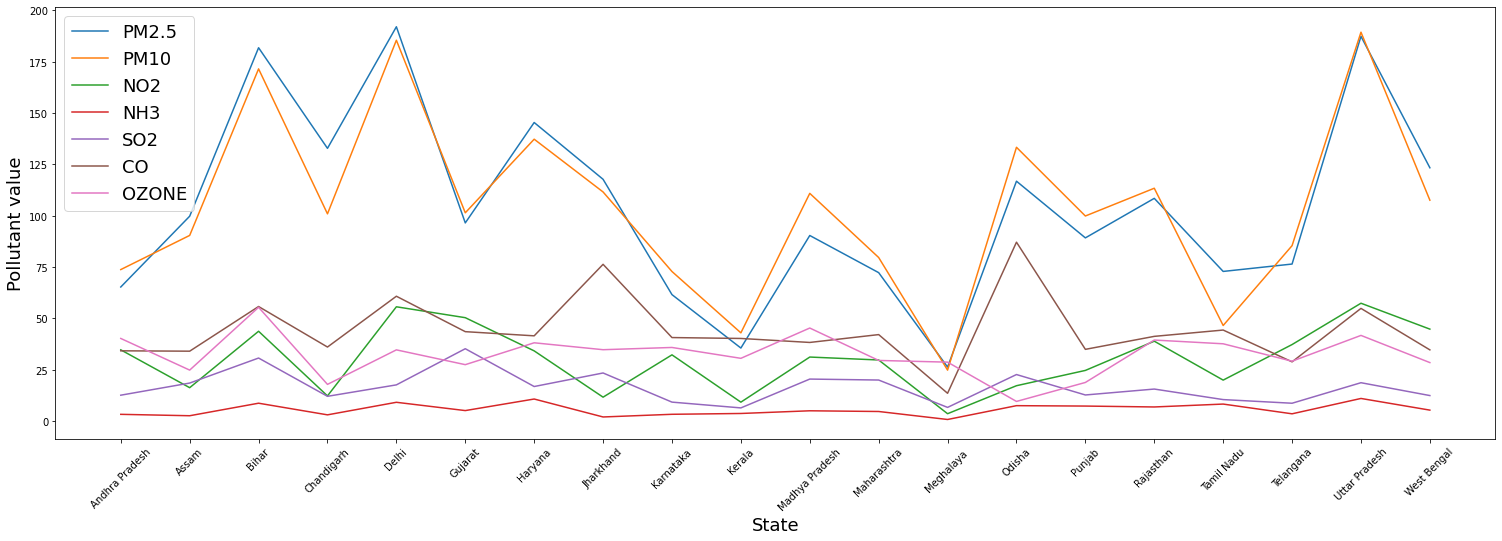

In [36]:
fig = plt.figure(figsize=[20,6])
axes = fig.add_axes([0,0,1,1])
axes.plot(averageByState['stateid'], averageByState.loc[:,['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']])
axes.tick_params(axis='x', labelrotation=45)
axes.legend(labels=['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'],prop={'size': 18})
axes.set_xlabel('State', {"fontsize":18})
axes.set_ylabel('Pollutant value', {"fontsize":18})

In [37]:
averageByState.sort_values(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], ascending=False).head()

,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
4,Delhi,191.962938,185.405864,55.623284,9.125502,17.604565,60.762137,34.651642
18,Uttar Pradesh,187.305332,189.321095,57.354632,10.993634,18.659375,54.839648,41.688723
2,Bihar,181.754640,171.459406,43.709340,8.680100,30.672106,55.756039,55.372287
6,Haryana,145.346445,137.219375,34.156102,10.716016,16.802603,41.483650,38.092917
3,Chandigarh,132.765240,100.877082,12.234455,3.011390,12.034603,36.025328,17.841218


In [38]:
averageByState.sort_values(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], ascending=True).head()

,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
12,Meghalaya,26.264822,24.786474,3.564048,0.750505,6.637961,13.507007,28.671877
9,Kerala,35.536174,42.937131,9.190341,3.679082,6.392036,40.203712,30.531366
8,Karnataka,61.545353,72.798270,32.223860,3.280722,9.209479,40.642867,35.818270
0,Andhra Pradesh,65.259116,73.742402,34.663076,3.261853,12.581786,34.189744,40.204513
11,Maharashtra,72.244796,79.609418,29.722850,4.645389,19.960966,42.084321,29.500414


### Top 5 states are
'Delhi', 'Uttar Pradesh', 'Bihar', 'Haryana', 'Chandigarh'

### Bottom 5 states are
'Meghalaya ', 'Kerala', 'Karnataka', 'Andhra Pradesh', 'Maharashtra'

### Is seasonality exists in the pollution?

In [39]:
df['month'] = df['datetime'].dt.month_name()

In [40]:
df['month'] = df['month'].astype(pd.CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July' ,'August', 'September', 'October', 'November', 'December'], ordered=True))

In [41]:
monthlyAverage = df.loc[:,['month','PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].groupby('month', as_index=False).mean()
monthlyAverage

,month,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,January,221.401976,183.891272,58.256996,9.255617,20.151835,55.666935,33.026892
1,February,159.563893,138.556848,49.687800,8.755058,18.372142,48.419263,34.783922
2,March,124.985498,128.929535,44.468873,7.912644,20.071122,44.829476,42.105034
3,April,122.849657,145.636899,42.444126,7.744592,21.085942,45.124293,47.589381
4,May,124.280811,150.686369,40.472827,6.950420,19.856721,45.346690,49.531398
5,June,90.778411,119.450751,32.363794,5.942232,15.651800,39.958747,45.077860
6,July,62.618831,84.000322,27.185320,6.104242,12.718981,39.213379,28.460910
7,August,48.239553,63.214400,27.073529,5.806762,12.854524,39.641280,23.542906
8,September,51.876012,65.252187,26.236154,5.631234,12.917010,38.624740,25.199429
9,October,142.056915,131.359351,42.600796,7.108241,15.605154,49.771602,34.500881


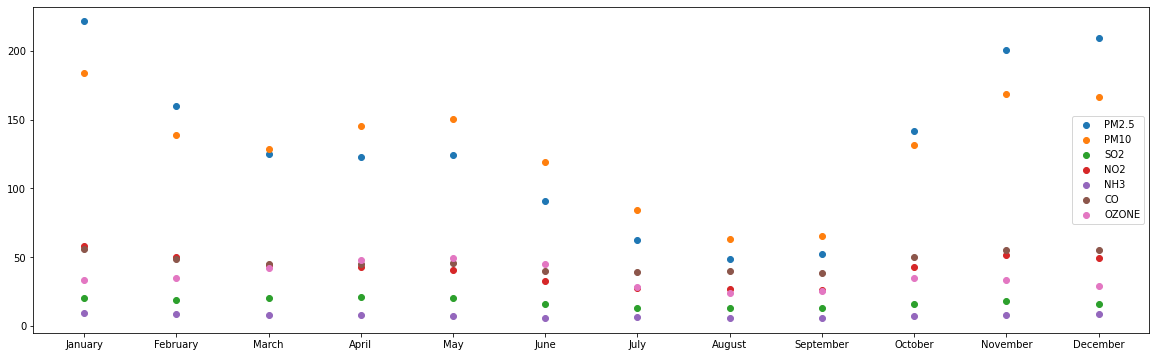

In [42]:
fig = plt.figure(figsize=[20,6])
axes = fig.subplots()
axes.scatter(monthlyAverage['month'],monthlyAverage['PM2.5'], label = 'PM2.5')
axes.scatter(monthlyAverage['month'],monthlyAverage['PM10'], label= 'PM10')
axes.scatter(monthlyAverage['month'],monthlyAverage['SO2'], label='SO2')
axes.scatter(monthlyAverage['month'],monthlyAverage['NO2'], label='NO2')
axes.scatter(monthlyAverage['month'],monthlyAverage['NH3'], label='NH3')
axes.scatter(monthlyAverage['month'],monthlyAverage['CO'], label= 'CO')
axes.scatter(monthlyAverage['month'],monthlyAverage['OZONE'], label='OZONE')
axes.legend()

### Pollution is low during august and september and high during winters (November, December, January)

### What time of the day has more pollution ?

In [43]:
df['hour'] = df['datetime'].dt.hour

In [44]:
df['hour'] = df['hour'].astype(pd.CategoricalDtype([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], ordered=True))

In [45]:
hourlyAverage = df.loc[:,['hour','PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].groupby('hour', as_index=False).mean()

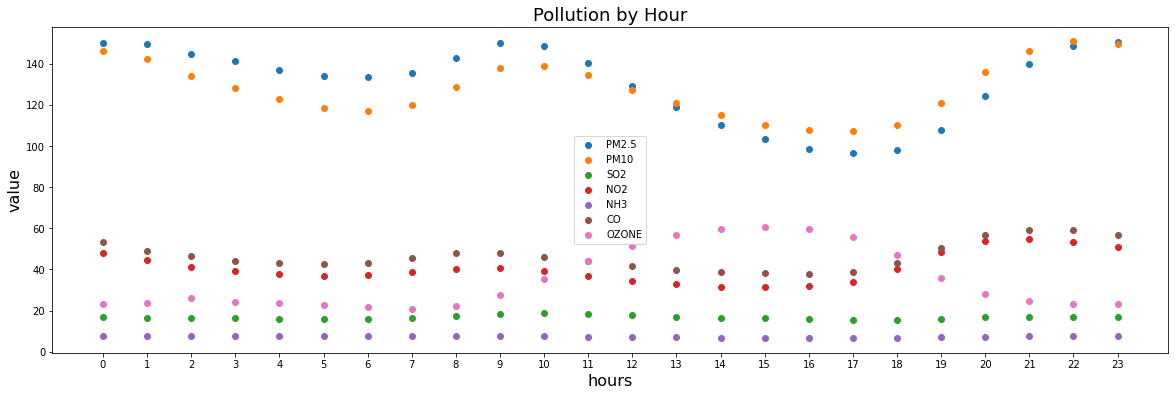

In [46]:
fig = plt.figure(figsize=[20,6])
axes = fig.subplots()
axes.scatter(hourlyAverage['hour'],hourlyAverage['PM2.5'], label = 'PM2.5')
axes.scatter(hourlyAverage['hour'],hourlyAverage['PM10'], label= 'PM10')
axes.scatter(hourlyAverage['hour'],hourlyAverage['SO2'], label='SO2')
axes.scatter(hourlyAverage['hour'],hourlyAverage['NO2'], label='NO2')
axes.scatter(hourlyAverage['hour'],hourlyAverage['NH3'], label='NH3')
axes.scatter(hourlyAverage['hour'],hourlyAverage['CO'], label= 'CO')
axes.scatter(hourlyAverage['hour'],hourlyAverage['OZONE'], label='OZONE')
axes.set_xticks(range(24))
axes.set_xlabel('hours', {"fontsize":16})
axes.set_ylabel('value', {"fontsize":16})
axes.set_title('Pollution by Hour', {"fontsize":18})
axes.legend()

#### PM2.5 and PM10 pollutants are low during 4:00 PM and 5:00 PM and O3(OZONE) pollutants are high during 2:00 PM and 3:00 PM
#### Perfect time for jogging or outdoor activities is during 4:00 PM - 5:00 PM or 5:00 AM - 6:00 AM

### Pollution on weekends vs weekdays

In [49]:
df['dayoftheweek'] = df['datetime'].dt.dayofweek

In [50]:
df['weekend'] = 'weekday'
df.loc[df['dayoftheweek'].isin([5,6]),'weekend'] = 'weekend'

In [51]:
df['weekend'] = df['weekend'].astype(pd.CategoricalDtype(['weekday','weekend']))


In [52]:
weekendGrp = df.loc[:,['weekend','PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].groupby('weekend', as_index=False).mean()
weekendGrp

,weekend,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,weekday,132.295965,129.724202,41.349698,7.324721,16.802096,46.952231,35.125432
1,weekend,125.548220,123.403894,39.045305,7.138585,16.559044,45.026706,34.691610


In [53]:
weekendGrp[weekendGrp['weekend'] == 'weekend'].loc[:,['PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].values[0]

array([123.40389448,  39.04530451,   7.13858454,  16.55904441,
        45.02670596,  34.69161046])

Text(0.5, 1.0, 'Pollution on weekdays vs weekends')

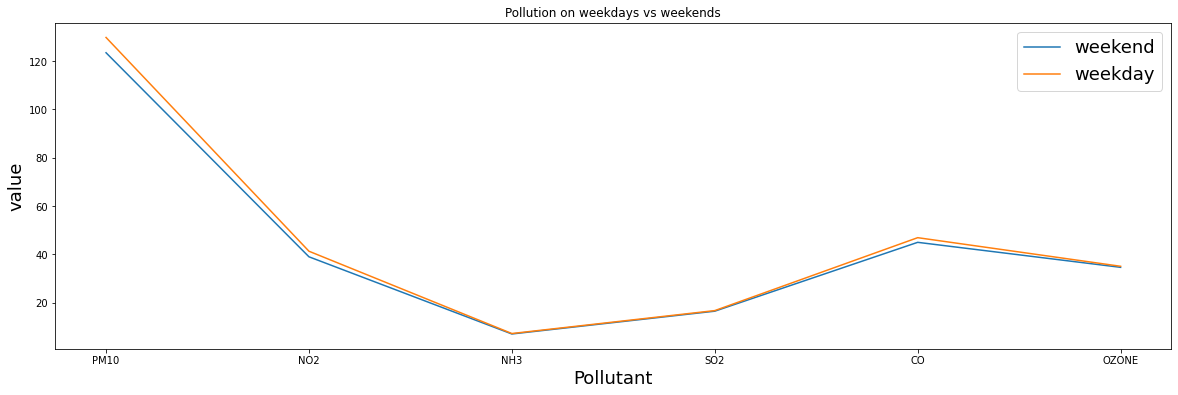

In [55]:
fig = plt.figure(figsize=[20,6])
axes = fig.subplots()
axes.plot(['PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'],weekendGrp[weekendGrp['weekend'] == 'weekend'].loc[:,['PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].values[0], label='weekend')
axes.plot(['PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'],weekendGrp[weekendGrp['weekend'] == 'weekday'].loc[:,['PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].values[0], label='weekday')
axes.legend(prop={'size':18})
axes.set_xlabel('Pollutant', {"fontsize":18})
axes.set_ylabel('value', {"fontsize":18})
axes.set_title('Pollution on weekdays vs weekends')

#### It seems pollution is almost equal during both weekends and weekdays

### Pollution during festive seasons
###### In India, the festivals which causes air pollution are New Year and Deepavali
###### Deepavali is on Sunday, 27 October 2019 and New year is on 01 January

In [56]:
df[df['datetime'] == '2019-10-27'].mean()

longitude        77.878779
latitude         24.180954
PM2.5           245.865169
PM10            211.475309
NO2              59.093855
NH3               8.855456
SO2              16.825043
CO               74.745879
OZONE            15.678473
hour              0.000000
dayoftheweek      6.000000
dtype: float64

In [57]:
df[df['datetime'] == '2019-01-01'].mean()

longitude        78.090062
latitude         24.171042
PM2.5           329.200000
PM10            305.310000
NO2              81.223494
NH3              10.296480
SO2              22.686300
CO               87.114687
OZONE            19.744321
hour              0.000000
dayoftheweek      1.000000
dtype: float64